## Polynomial Regression Template

In [2]:
# first import group (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Polynoomial Regression group
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

In [5]:
df=pd.read_csv('Advertising.csv')

**1-EDA part**

In [6]:
#Looking up the data
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


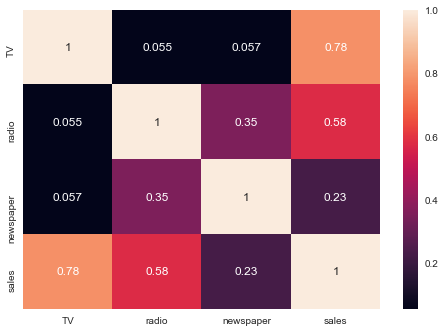

In [8]:
sns.heatmap(df.corr(), annot=True)

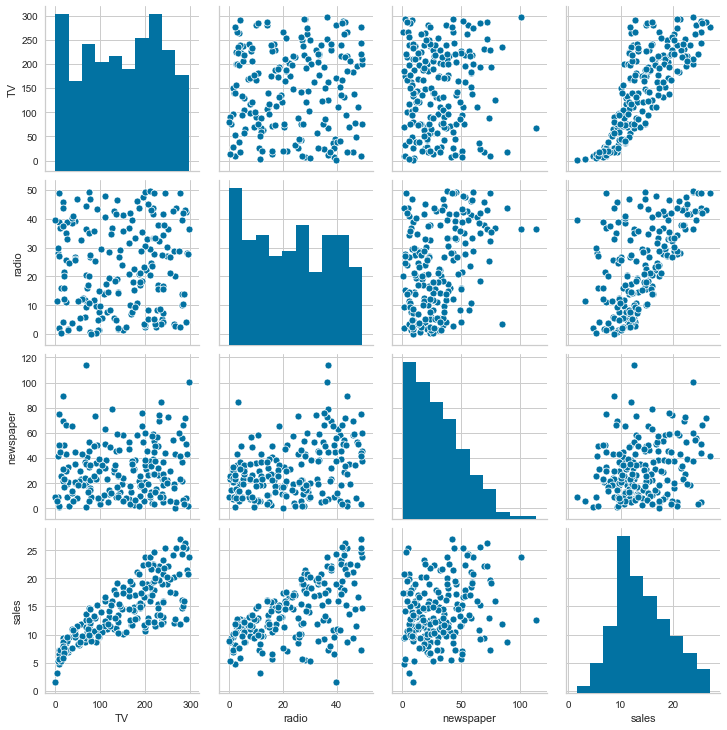

In [9]:
sns.pairplot(df)

**2-Polynomial Conversion**

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
X=df.drop(['sales'], axis=1)
y=df.sales

In [21]:
polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(X)

In [22]:
poly_features.shape # X.shape was (200, 3)

(200, 10)

**3-Split to convert and train**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

**4-Creating Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

**5-Training Model**

In [27]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**6-Model Evaluation**

In [28]:
model.intercept_

5.125557423132108

In [32]:
coeff_df = pd.DataFrame(data=model.coef_, columns=['Coefficient'])

In [33]:
coeff_df

,Coefficient
0,0.000000
1,0.051710
2,0.013085
3,0.012000
4,-0.000111
5,0.001142
6,-0.000052
7,0.000033
8,0.000146
9,-0.000030


**7-Prediction and evaluation metrics**

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual,pred)
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    score = r2_score(actual,pred)
    return print(f'r2_score: {score} \n mae: {mae} \n mse: {mse} \n rmse: {rmse}')

In [37]:
eval_metrics(y_test, y_pred)

r2_score: 0.9843529333146764 
 mae: 0.48967980448041754 
 mse: 0.44175055104042776 
 rmse: 0.6646431757269669


**8-Scoring and comparison**

In [38]:
model.score(X_test, y_test)

0.9843529333146765

In [39]:
comparison = {'Actual': y_test, 'Model prediction': y_pred}
comparison_df = pd.DataFrame(comparison)

In [41]:
comparison_df.sample(10)

,Actual,Model prediction
33,17.4,17.379266
78,5.3,6.155733
36,25.4,25.037789
16,12.5,12.657310
149,10.1,9.156263
102,14.8,14.236222
121,7.0,7.461990
66,9.5,7.902109
119,6.6,6.941438
148,10.9,9.446145


**9-Yellowbrick viz score**

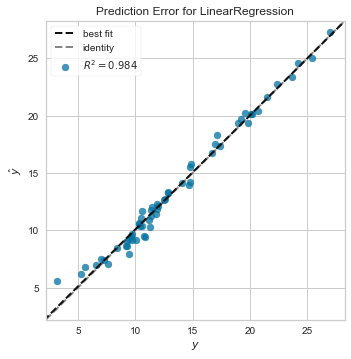

In [42]:
from yellowbrick.regressor import PredictionError
viz = PredictionError(model) 
viz.fit(X_train, y_train) # Fit the training data to the visualizer
viz.score(X_test, y_test) # Evaluate the model on the test data
viz.show()

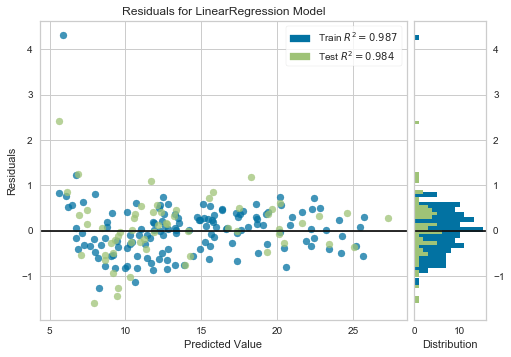

In [43]:
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(model)   
viz.fit(X_train, y_train) # Fit the training data to the visualizer
viz.score(X_test, y_test) # Evaluate the model on the test data
viz.show()                # Finalize and render the figure

**9-Cross Validation**

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
print(f"Accuracy: {accuracies.mean():0.4f} (+/- {accuracies.std()*2:0.2f})")

Accuracy: 0.9814 (+/- 0.04)
